# ML Correlation Notebook
# <h3> By: Peter Giannetos <h3>

In [14]:
# Import needed libraries/APIs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [30]:
eurusd_hour = pd.read_csv('EUR USD Forex Data/eurusd_hour.csv')
eurusd_minute = pd.read_csv('EUR USD Forex Data/eurusd_minute.csv')
eurusd_news = pd.read_csv('EUR USD Forex Data/eurusd_news.csv')


In [ ]:
print("Hello World")


speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
v = np.mean(speed)

print(v)

x = [24, 25, 26]
y = [23,24,25]
z = [10, 5, 0]
plt.plot(x,y)
plt.plot(x,z)
plt.title("Test Plot")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.legend(["Thisis y", "This is z"])
plt.show()


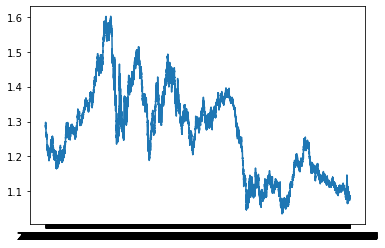

In [28]:
eurusd_hour = pd.read_csv('EUR USD Forex Data/eurusd_hour.csv')

plt.plot(eurusd_hour.Date,eurusd_hour.BC)

plt.show()

In [ ]:
api.competition_download_file()